In [ ]:
#Necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#load dataset
df = pd.read_csv('/content/Project Management Dataset.csv')
print(df.head())
print(df.tail())


                Project Name  \
0                 Rhinestone   
1     A Triumph Of Softwares   
2              The Blue Bird   
3  Remembering Our Ancestors   
4                   Skyhawks   

                                 Project Description  \
0  Associations Now Is A Casual Game To Teach You...   
1  Is A Fully Managed Content Marketing Software ...   
2  Most Content Marketers Know The Golden Rule: Y...   
3  Utilize And Utilizes (Verb Form) The Open, Inc...   
4  Is A Solution For Founders Who Want To Win At ...   

                  Project Type  Project Manager Region           Department  \
0            INCOME GENERATION      Yael Wilcox  North           Admin & BI   
1            INCOME GENERATION  Brenda Chandler   West            eCommerce   
2            INCOME GENERATION    Nyasia Hunter  North            Warehouse   
3          PROCESS IMPROVEMENT  Brenda Chandler   East  Sales and Marketing   
4  WORKING CAPITAL IMPROVEMENT  Jaylyn Mckenzie   East            eCommerce

In [ ]:
#finding no.of null values
print(df.isnull().sum())

Project Name           0
Project Description    0
Project Type           0
Project Manager        0
Region                 0
Department             0
 Project Cost          0
 Project Benefit       0
Complexity             0
Status                 0
Completion%            0
Phase                  0
Year                   0
Month                  0
Start Date             0
End Date               0
dtype: int64


In [ ]:
#describing min,max,mean,std
print(df.describe())

              Year      Month
count    99.000000  99.000000
mean   2022.747475   7.151515
std       1.402210   3.211471
min    2021.000000   1.000000
25%    2022.000000   4.500000
50%    2022.000000   7.000000
75%    2024.000000  10.000000
max    2025.000000  12.000000


In [ ]:
#Identifying the datatypes
print(df.dtypes)

Project Name           object
Project Description    object
Project Type           object
Project Manager        object
Region                 object
Department             object
 Project Cost          object
 Project Benefit       object
Complexity             object
Status                 object
Completion%            object
Phase                  object
Year                    int64
Month                   int64
Start Date             object
End Date               object
dtype: object


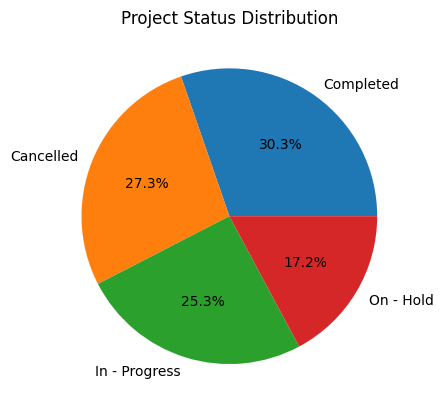

In [ ]:
#project status distribution
plt.pie(df['Status'].value_counts(),labels=df['Status'].value_counts().index,autopct='%1.1f%%')
plt.title('Project Status Distribution')
plt.show()


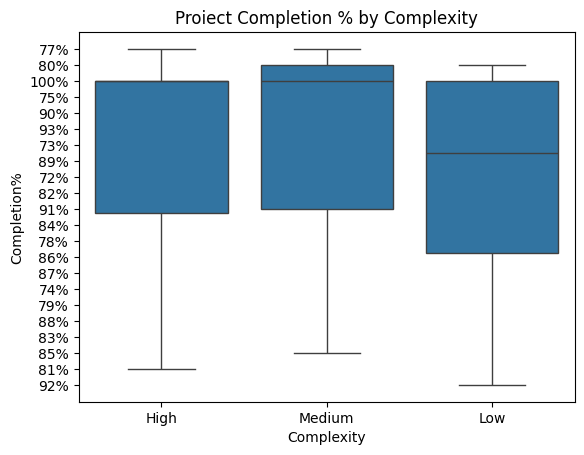

In [ ]:
sns.boxplot(data=df,x='Complexity',y='Completion%',showfliers=False)
plt.title('Proiect Completion % by Complexity')
plt.show()

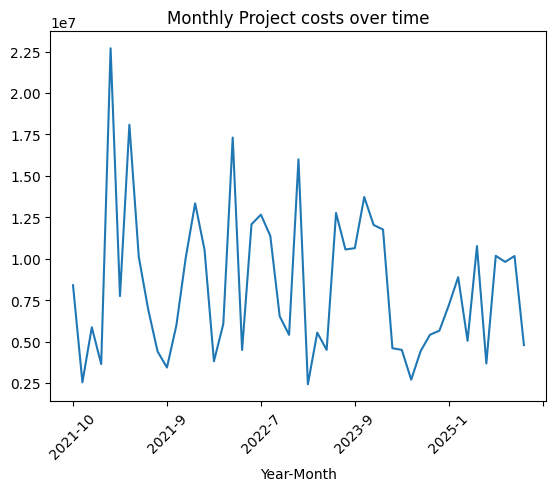

In [ ]:
df['Year-Month']=df['Year'].astype(str)+'-'+df['Month'].astype(str)
df.groupby('Year-Month')[' Project Cost '].sum().plot()
plt.title('Monthly Project costs over time')
plt.xticks(rotation=45)
plt.show()

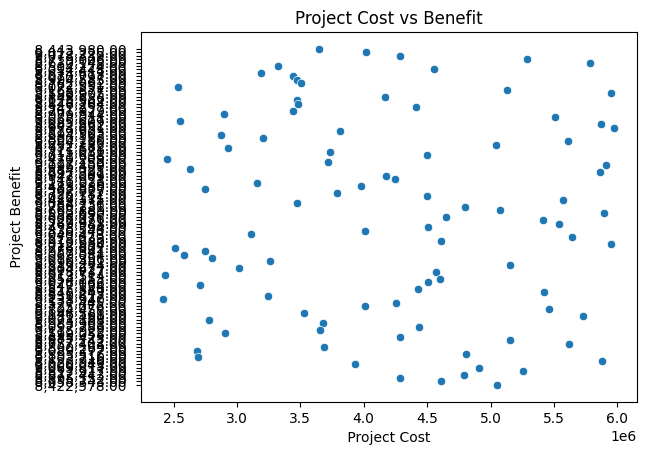

In [ ]:
sns.scatterplot(data=df,x=' Project Cost ',y=' Project Benefit ')
plt.title('Project Cost vs Benefit')
plt.show()

In [ ]:
df[' Project Cost '] = df[' Project Cost '].str.replace(',', '').astype(float)

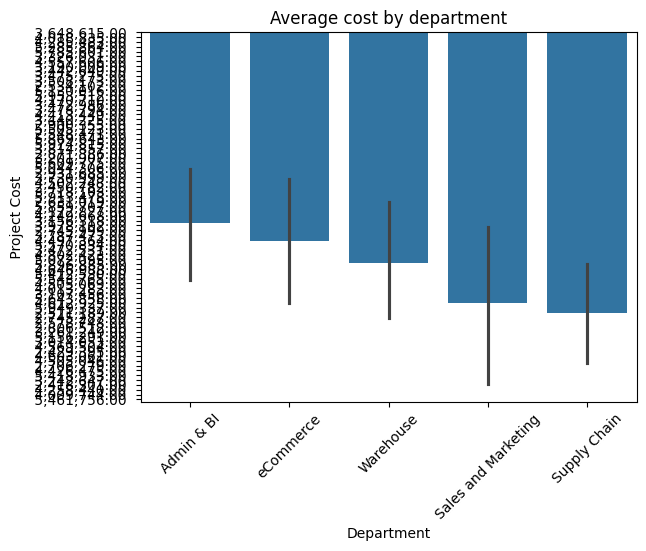

In [ ]:
#average cost by department
sns.barplot(data=df,x='Department',y=' Project Cost ',estimator=np.mean)
plt.xticks(rotation=45)
plt.title('Average cost by department')
plt.show()

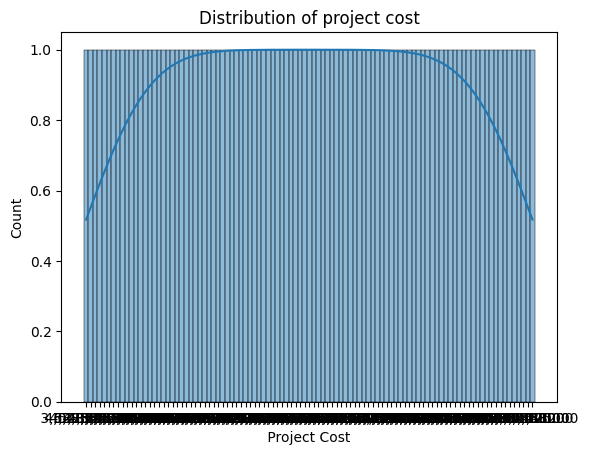

In [ ]:

#Distribution of project cost
sns.histplot(data=df,x=' Project Cost ',kde=True)
plt.title('Distribution of project cost')
plt.show()

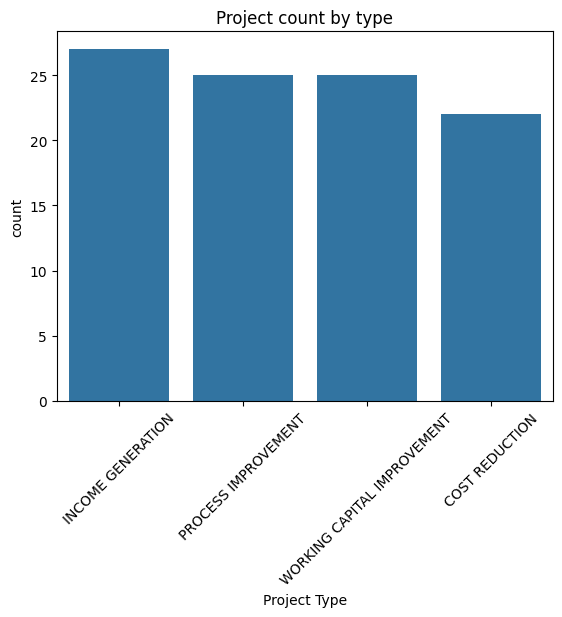

In [ ]:
#project count by type
sns.countplot(data=df,x='Project Type')
plt.xticks(rotation=45)
plt.title('Project count by type')
plt.show()


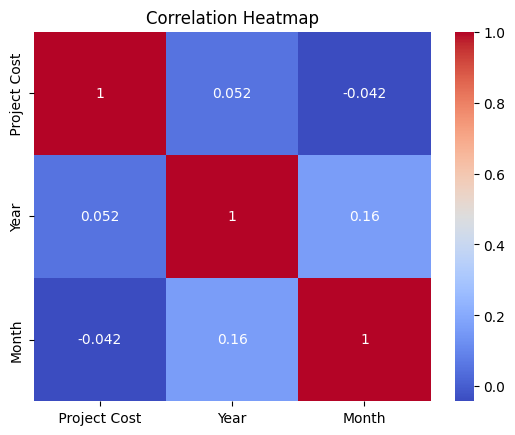

In [ ]:
numeric_df = df.select_dtypes(include=['number'])

corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
import plotly.express as px

fig = px.scatter_3d(df, x=' Project Cost ', y=' Project Benefit ', z='Complexity',
                  color='Project Type')
fig.update_layout(scene = dict(
                    xaxis = dict(title  = 'Project Cost'),
                    yaxis = dict(title  = 'Project Benefit'),
                    zaxis = dict(title  = 'Complexity')))
fig.show()